# Additional Spectral Domain Measures

These measures are not included in the main analyses, but briefly explored here.

Included measures:
- spectral entropy

In [1]:
# Setup notebook state
from nbutils import setup_notebook; setup_notebook()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [4]:
# Import custom project code
from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import spectral_entropy
from apm.methods.settings import SP_ENT_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.sim.examples import get_examples, check_examples
from apm.sim.settings import N_SIMS
from apm.sim.defs import SIM_ITERS

## Settings

In [5]:
# Get current sampling rate
fs = SIM_ITERS.fs

In [6]:
# Set data specific settings
SP_ENT_PARAMS['sf'] = fs

In [7]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / 'XX'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [8]:
# Set the random seed
set_random_seed(111)

In [9]:
# Define collection of example signals
examples = get_examples()

## Spectral Entropy

The spectral entropy measures the entropy of the power spectrum.

In [10]:
# Check Settings
print('Spectral Entropy:\t', SP_ENT_PARAMS)

Spectral Entropy:	 {'sf': 250, 'method': 'fft'}


#### Calculate Spectral Entropy on Example Signals

In [11]:
# Check spectral entropy measures on example signals
check_examples(examples, spectral_entropy, SP_ENT_PARAMS, 'spectral entrop')

Computed spectral entrop:
  powerlaw       : 	 9.9070
  synaptic       : 	 10.4354
  knee           : 	 10.3672
  oscillation    : 	 0.0000
  burst          : 	 4.6841
  combined       : 	 7.4067
  comb_burst     : 	 9.2739
  comb_peak      : 	 9.0464


#### Aperiodic Variations

In [12]:
# Run simulations calculating spectral entropy across exponents
spe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], spectral_entropy, SP_ENT_PARAMS, N_SIMS)

In [13]:
# Run simulations calculating spectral entropy across exponents with an oscillation
spe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], spectral_entropy, SP_ENT_PARAMS, N_SIMS)

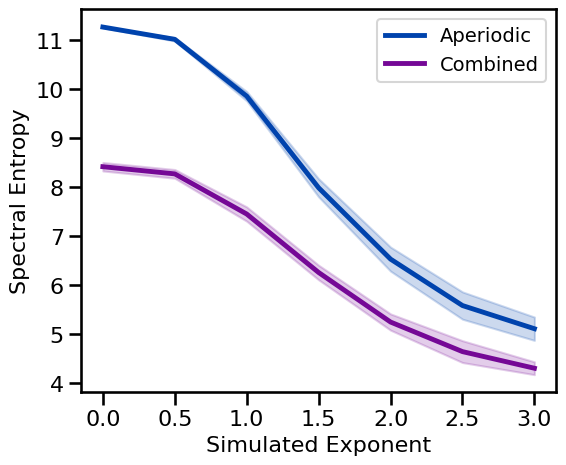

In [14]:
# Plot spectral entropy measures across aperiodic variations
plot_ap_sims(spe_sims_exp, spe_sims_comb, 'Spectral Entropy', **fsaver('spe_ap'))

#### Periodic Variations

In [15]:
# Run simulations calculating spectral entropy across oscillation frequecy
spe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], spectral_entropy, SP_ENT_PARAMS, N_SIMS)

In [16]:
# Run simulations calculating spectral entropy across oscillation power
spe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], spectral_entropy, SP_ENT_PARAMS, N_SIMS)

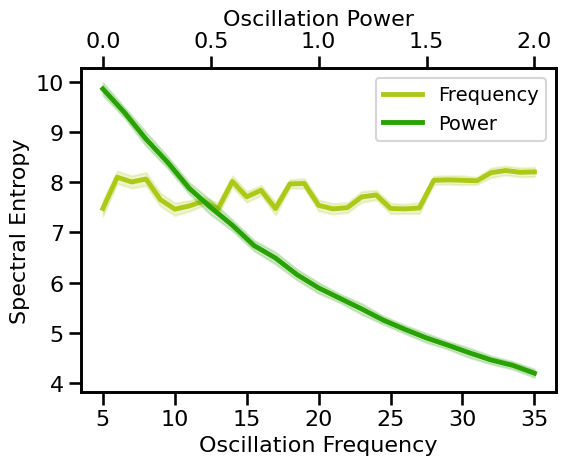

In [17]:
# Plot spectral entropy measures across periodic variations
plot_pe_sims(spe_sims_freq, spe_sims_pow, 'Spectral Entropy', **fsaver('spe_pe'))

### Knee Variations

In [18]:
# Run simulations calculating spectral entropy across timescales
spe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            spectral_entropy, SP_ENT_PARAMS, N_SIMS)

In [19]:
# Run simulations calculating spectral entropy across knee values (sims from file)
spe_sims_knee = run_sims_load('ap-knee-' + str(fs), spectral_entropy, SP_ENT_PARAMS)

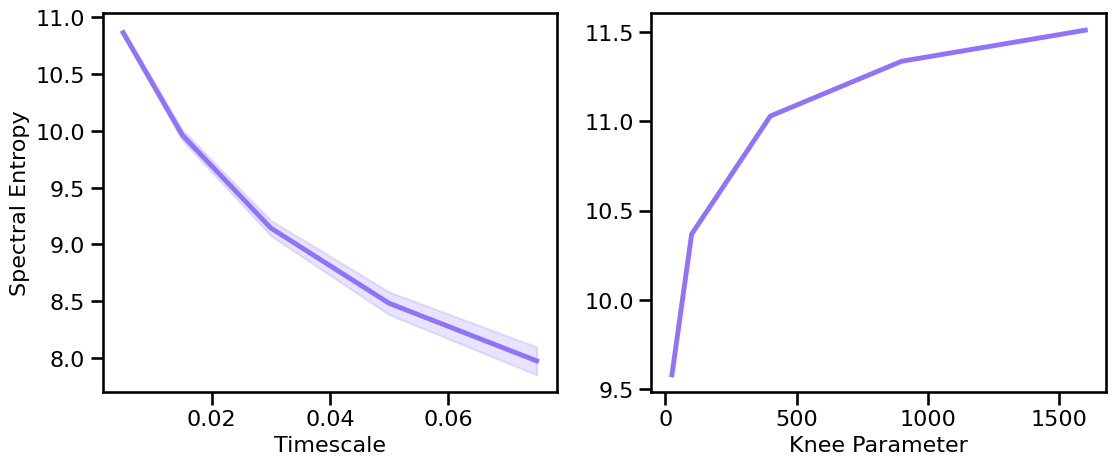

In [20]:
# Plot the estimated spectral entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, spe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, spe_sims_knee, 'Knee Parameter',
              ylabel='Spectral Entropy', color=COLORS['KN'], **fsaver('spe_kn_vars'))

### Periodic Variations

In [21]:
# Run simulations calculating spectral entropy across peak bandwidths (sims from file)
spe_sims_bw = run_sims_load('comb-bw-' + str(fs), spectral_entropy, SP_ENT_PARAMS)

In [22]:
# Run simulations calculating spectral entropy across burst probabilities
spe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], spectral_entropy, SP_ENT_PARAMS, N_SIMS)

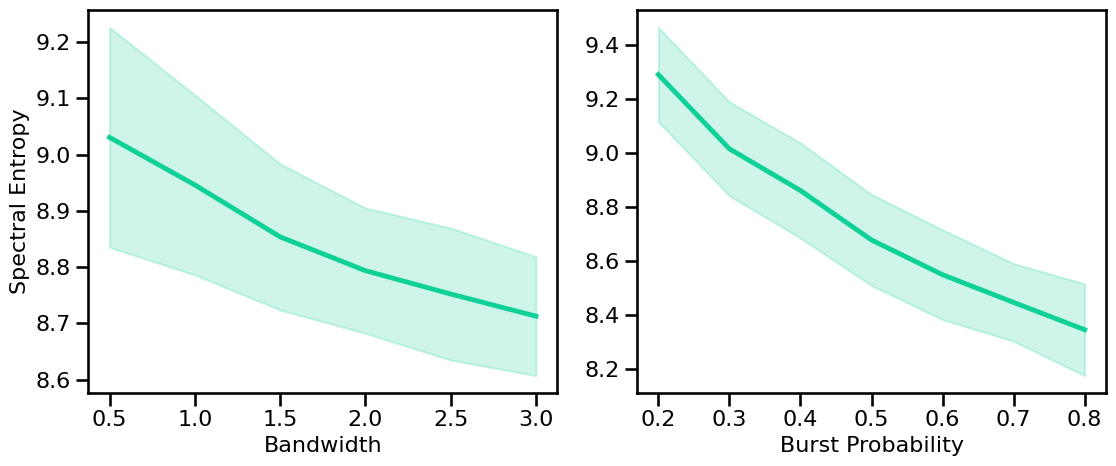

In [23]:
# Plot the estimated spectral entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, spe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, spe_sims_burst, 'Burst Probability',
              ylabel='Spectral Entropy', color=COLORS['BW'], **fsaver('spe_pe_vars'))